# Principal Component Analysis from scratch
(Without the usage of scikit-learn's PCA class)

## Importing all the necessary dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Analysis of the data

Using the MNIST handwritten data which was available on kaggle for this mini-project

In [2]:
train = pd.read_csv("C:\\Users\\harip\\Downloads\\digit-recognizer\\train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = train.drop(['label'],axis=1)
train_label = train['label']

In [5]:
train_data.shape

(42000, 784)

In [6]:
train_label.shape

(42000,)

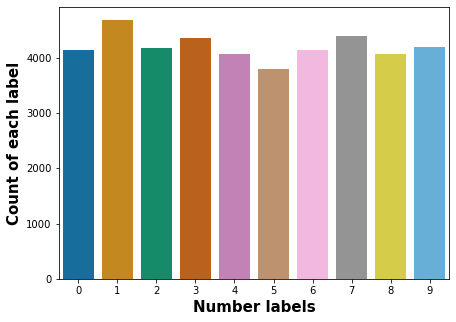

In [7]:
plt.figure(figsize = (7,5))
sb.countplot(train_label, palette = 'colorblind')
plt.xlabel('Number labels',fontweight='bold',size=15)
plt.ylabel('Count of each label',fontweight='bold',size=15)
plt.show()

## Steps involved in dimensionality reduction of the data without using sklearn's PCA
1. Scale the data properly, since we want to give equal importance to all the features
2. Constructing the covariance matrix
3. Finding the eigen values and eigen vectors of the same matrix
4. Sorting the eigen values in the descending order to sort the eigen vector matrix
5. Forming a projection matrix (W) out of the k largest eigen values (k<=d)
6. Transforming the data by projecting it on W

### Step 1. Scale the data

Splitting the data into training and test sets

In [8]:
x_train,x_test, y_train,y_test = train_test_split(train_data, train_label,test_size=0.25,random_state = 42)

In [9]:
x_train.shape

(31500, 784)

In [10]:
x_test.shape

(10500, 784)

Calling Sklearn's StandardScaler

In [11]:
Sc = StandardScaler()
x_train_std = Sc.fit_transform(x_train)
x_test_std = Sc.transform(x_test)

### Step 2. Finding the covariance matrix

In [12]:
Cov_mat = np.cov(x_train_std.T)

### Step 3. Finding the eigen values and eigen vectors from the covariance matrix

In [13]:
eigen_values, eigen_vectors = np.linalg.eigh(Cov_mat)

In [14]:
eigen_vectors.shape

(784, 784)

In [15]:
eigen_values.shape

(784,)

### Step 4. Sorting the eigen values in the descending order to sort the eigen vector matrix

In [16]:
Total_variance = sum(eigen_values)

In [17]:
variance_explained = [(i/Total_variance) for i in sorted(eigen_values,reverse=True)]

In [18]:
Cumulative_variance = np.cumsum(variance_explained)

Creating a numpy array that will contain the number of eigen vectors which will range from 1 to d (where d = the dimension of the original data, which is 784)

In [19]:
eigen_vector_array = np.arange(1,785)

In [20]:
len(eigen_vector_array)

784

Plotting the scree plot

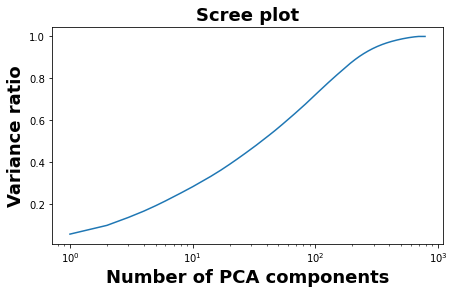

In [21]:
plt.figure(figsize=(7,4))
plt.plot(eigen_vector_array,Cumulative_variance)
plt.xscale('log')
plt.title('Scree plot',fontweight = 'bold',size=18)
plt.xlabel('Number of PCA components',fontweight='bold',size = 18)
plt.ylabel('Variance ratio',fontweight='bold',size = 18)
plt.show()

### Step 5. Forming a projection matrix (W)

In [22]:
eigen_pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]

In [23]:
eigen_pairs.sort(key = lambda x:x[0], reverse = True)

Taking only the top two (largest two) eigen values so as to facilitate visualization 

In [24]:
W = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))

### Step 6. Transforming the data

In [25]:
x_new = x_train_std.dot(W)

In [26]:
x_new.shape

(31500, 2)

In [27]:
y_train.shape

(31500,)

Plotting a scatter plot of the principal components against each other

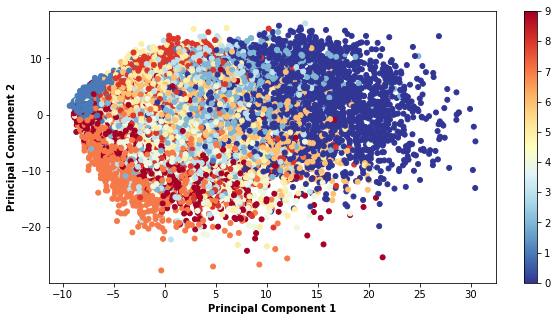

In [28]:
plt.figure(figsize = (10,5))
plt.scatter(x_new[:,0],x_new[:,1],s = 25,c = y_train, cmap = 'RdYlBu_r' )
plt.colorbar()
plt.xlabel('Principal Component 1',fontweight = 'bold')
plt.ylabel('Principal Component 2',fontweight = 'bold')
plt.show()